In [141]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Чтение картинки фореза

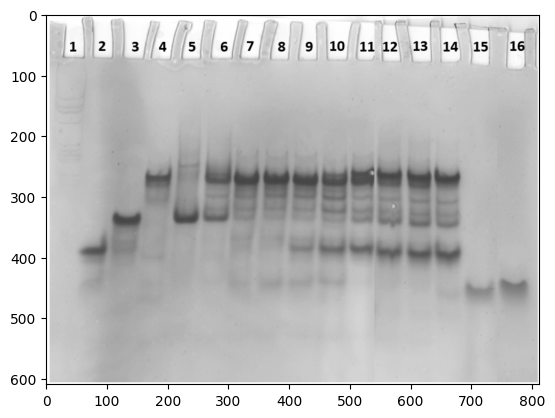

In [142]:
imageName = 'images/Forez1.png'
nLines = 16
# reading the image
testImage = cv.imread(imageName, cv.IMREAD_GRAYSCALE)
# displaying the image
plt.imshow(testImage, cmap='gray');

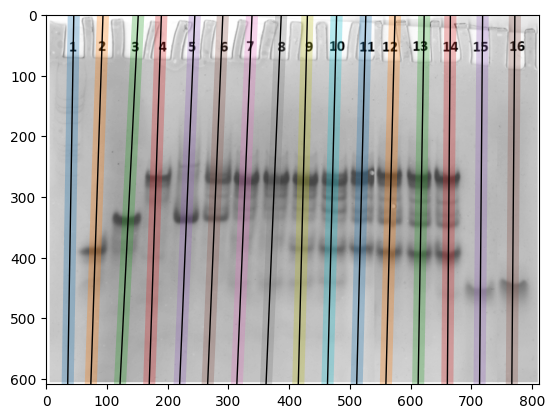

In [146]:
yLen, xLen = len(testImage), len(testImage[0])
leftOffset = xLen/(nLines+2)
rightOffset = xLen/(nLines+2)
fittingTermsDown, fittingTermsOffset = [-10]*nLines, [0]*nLines
fittingTermsDown[0] , fittingTermsOffset[0]= -10,   0
fittingTermsDown[1] , fittingTermsOffset[1]= -20,   0
fittingTermsDown[2] , fittingTermsOffset[2]= -30,   10
fittingTermsDown[3] , fittingTermsOffset[3]= -20,   0
fittingTermsDown[4] , fittingTermsOffset[4]= -25,   7
fittingTermsDown[5] , fittingTermsOffset[5]= -25,   5
fittingTermsDown[6] , fittingTermsOffset[6]= -25,   5
fittingTermsDown[7] , fittingTermsOffset[7]= -25,   5
fittingTermsDown[8] , fittingTermsOffset[8]= -15,   0
fittingTermsDown[9] , fittingTermsOffset[9]= -15,   0
fittingTermsDown[10], fittingTermsOffset[10] = -15, 0
fittingTermsDown[11], fittingTermsOffset[11] = -15, 0
fittingTermsDown[12], fittingTermsOffset[12] = -10, 0
fittingTermsDown[13], fittingTermsOffset[13] = -5,  -5
fittingTermsDown[14], fittingTermsOffset[14] = -5,  0
fittingTermsDown[15], fittingTermsOffset[15] = -5,  5
plt.imshow(testImage, cmap='gray')
testImageNeg = 255 - testImage # make negative
forezLines = []
for i in range(nLines):
    forezLine = []
    xUp = leftOffset + (xLen - leftOffset-rightOffset)/(nLines-1)*i + fittingTermsOffset[i]
    xDown = xUp + fittingTermsDown[i]
    plt.plot([xUp, xDown], [0, yLen-1], lw=1, c='black')
    yLines = np.array(range(0, yLen))
    # yLine = lambda x: (yLen-1)*(x-xUp)/(xDown-xUp)
    xLine = lambda y: xUp + (xDown-xUp)*y/(yLen-1)
    for yCoord in yLines:
        forezLine.append(np.mean(testImageNeg[yCoord, int(xLine(yCoord)-10):int(xLine(yCoord)+10)]))
    plt.fill_betweenx(yLines, xLine(yLines)-10, xLine(yLines)+10, alpha=0.3)
    forezLines.append(forezLine)
    # if i == 1:
    #     plt.plot(forezLine, yLines)
plt.savefig('images/Forez1_withLines.png')
    

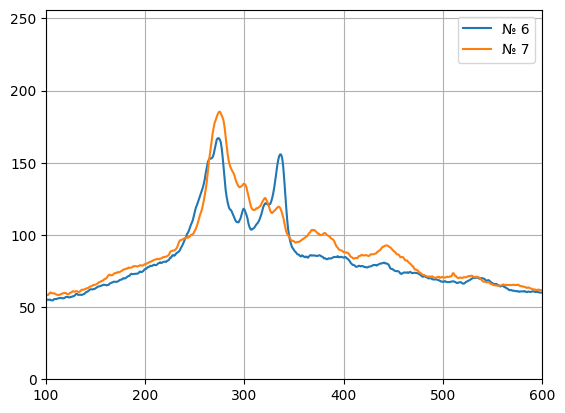

In [149]:
yLines = np.array(range(0, yLen))
for i in [5,6]: #range(nLines):
    plt.plot(yLines, forezLines[i], label=f"№ {i+1}")
plt.xlim(100, 600)
plt.ylim(0, 256)
plt.grid()
plt.legend()
plt.savefig('images/Forez1_5_6_Lines.png')